In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/leukemia.csv")

In [ ]:
data.dropna(subset=['has_cancer'], inplace=True)

In [ ]:
data['has_cancer'] = data['has_cancer'].map({'Yes': 1, 'No': 0})

In [ ]:
X = data.drop('has_cancer', axis=1)
y = data['has_cancer']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_continuous = model.predict(X_test)

In [ ]:
y_pred = (y_pred_continuous >= 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.70      0.78      0.74         9

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20



In [ ]:
import matplotlib.pyplot as plt

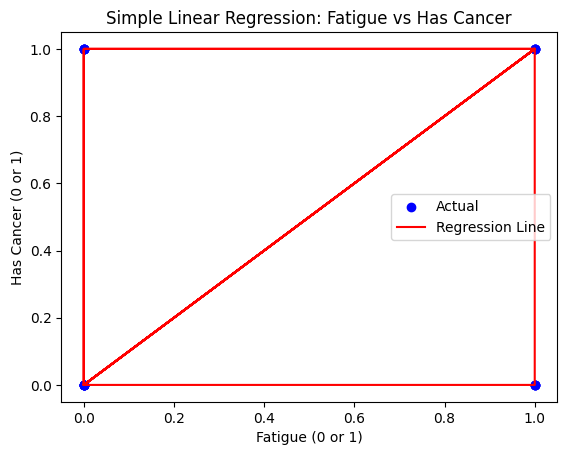

In [ ]:
plt.scatter(X_test['fatigue'], y_test, color='blue', label='Actual')
plt.plot(X_test['fatigue'], y_pred, color='red', label='Regression Line')
plt.xlabel('Fatigue (0 or 1)')
plt.ylabel('Has Cancer (0 or 1)')
plt.title('Simple Linear Regression: Fatigue vs Has Cancer')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
rf_y_pred = rf_model.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_y_pred))


Random Forest Accuracy: 0.8

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.78      0.78      0.78         9

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



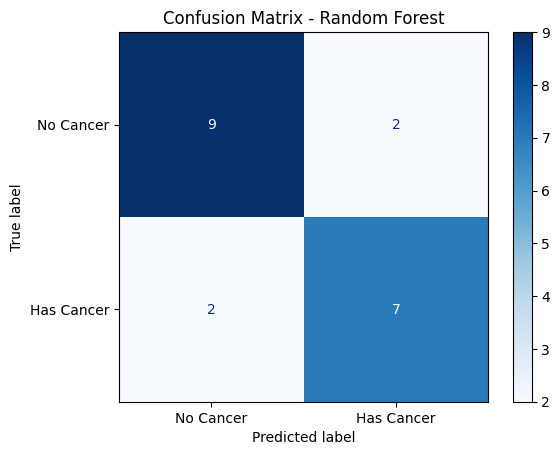

In [ ]:
cm = confusion_matrix(y_test, rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Cancer", "Has Cancer"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()